## U-NSGA-III


The algorithm is implemented based on <cite data-cite="unsga3"></cite>. NSGA-III selects parents randomly for mating. It has been shown that tournament selection performs better than random selection. The *U* stands for *unified* and increases the performance of NSGA-III by introducing tournament pressure. 

The mating selections works as follows:


<div style="display: block;margin-left: auto;margin-right: auto;width: 45%;">
![unsga3_mating](../resources/images/unsga3_mating.png)
</div>

### Example

In [24]:
from pymoo.optimize import minimize
from pymoo.util import plotting
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymop.factory import get_problem
from pymoo.factory import get_algorithm
import numpy as np

# create the reference directions to be used for the optimization
ref_dirs = UniformReferenceDirectionFactory(1, n_points=1).do()

# create the algorithm object
method = get_algorithm("unsga3",
                      pop_size=100,
                      ref_dirs=ref_dirs)

# execute the optimization
res = minimize(get_problem("ackley", n_var=30),
               method,
               termination=('n_gen', 150),
               save_history=True)

print("UNSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

UNSGA3: Best solution found: 
X = [ 0.05465695  0.09434147  0.08722548  0.04542166 -0.03278407 -0.02731537
 -0.00131087  0.11463744 -0.08500394 -0.01130517  0.13553583 -0.00817993
  0.00428872  0.09410164  0.02464309  0.05243073  0.05439257  0.02914276
  0.05451122  0.05896932  0.02242757 -0.05298486 -0.05860266  0.02603613
 -0.00902463 -0.07735629  0.13519097  0.02063418 -0.02596311  0.07336324]
F = [0.45926894]


U-NSGA-III has for single- and bi-objective problems a tournament pressure which is known to be useful.
In the following we provide a quick comparison (here just one run, so not a valid experiment), to see the difference in convergence.

In [28]:
_res = minimize(get_problem("ackley", n_var=30),
                get_algorithm("nsga3", pop_size=100, ref_dirs=ref_dirs),
               termination=('n_gen', 150),
               save_history=True)
print("NSGA3: Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

NSGA3: Best solution found: 
X = [ 0.05465695  0.09434147  0.08722548  0.04542166 -0.03278407 -0.02731537
 -0.00131087  0.11463744 -0.08500394 -0.01130517  0.13553583 -0.00817993
  0.00428872  0.09410164  0.02464309  0.05243073  0.05439257  0.02914276
  0.05451122  0.05896932  0.02242757 -0.05298486 -0.05860266  0.02603613
 -0.00902463 -0.07735629  0.13519097  0.02063418 -0.02596311  0.07336324]
F = [0.45926894]


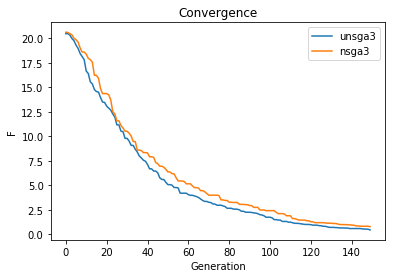

In [31]:
import numpy as np
import matplotlib.pyplot as plt

ret = [np.min(e.pop.get("F")) for e in res.history]
_ret = [np.min(e.pop.get("F")) for e in _res.history]

plt.plot(np.arange(len(ret)), ret, label="unsga3")
plt.plot(np.arange(len(_ret)), _ret, label="nsga3")
plt.title("Convergence")
plt.xlabel("Generation")
plt.ylabel("F")
plt.legend()
plt.show()